# Multiple Linear Regression
## BOOM BIKE

#### Problem Statement:

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


Essentially, the company wants —


Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
day = pd.read_csv("day.csv")

In [4]:
# Check the head of the data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [5]:
day.shape

(730, 16)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


one column which is date type while all other are either float or integer type.
some fields that are categorical in nature but are given in integer/float type. 

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

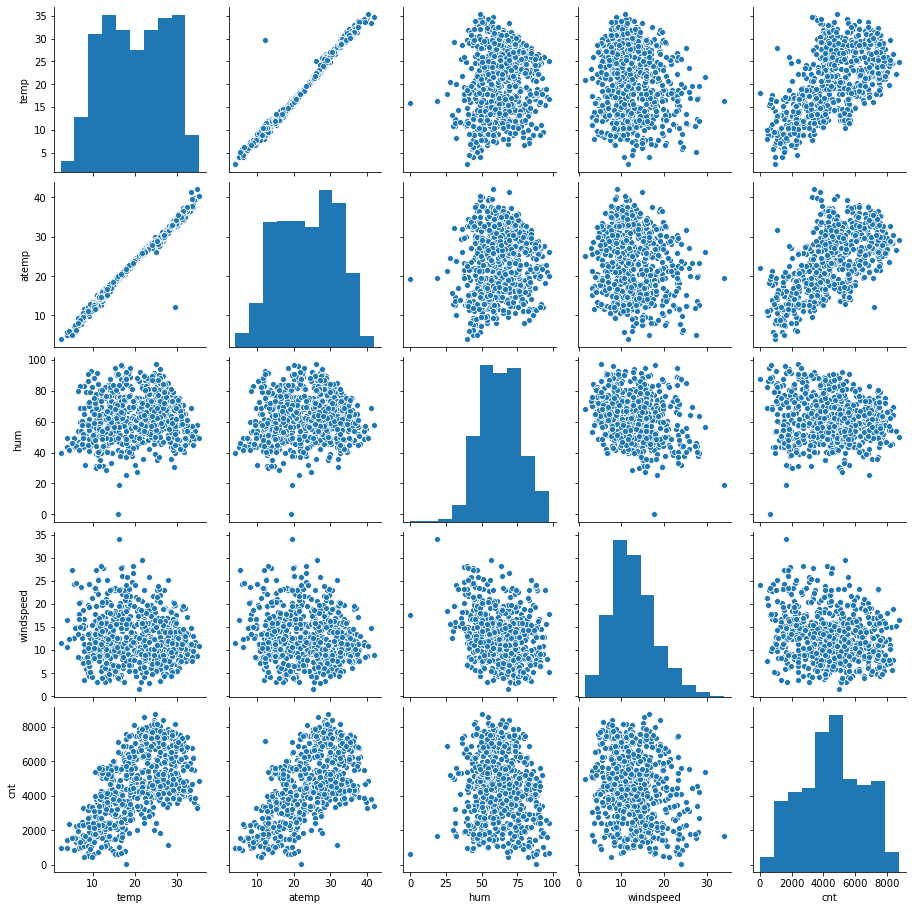

In [9]:
#Generating pairplot to check the relationships between numeric variables variables
day_numerical = day[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(day_numerical)
plt.show()

In [10]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

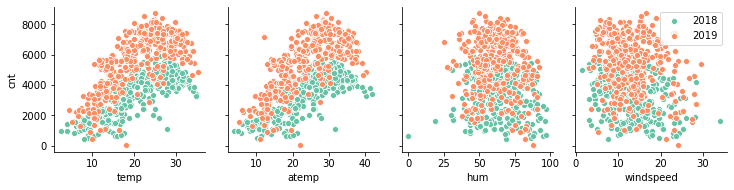

In [12]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=day, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

There are some unneccesary columns like Instant (just serial no), dteday (information already extracted in other columns)
Better to drop them in Data prep step

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

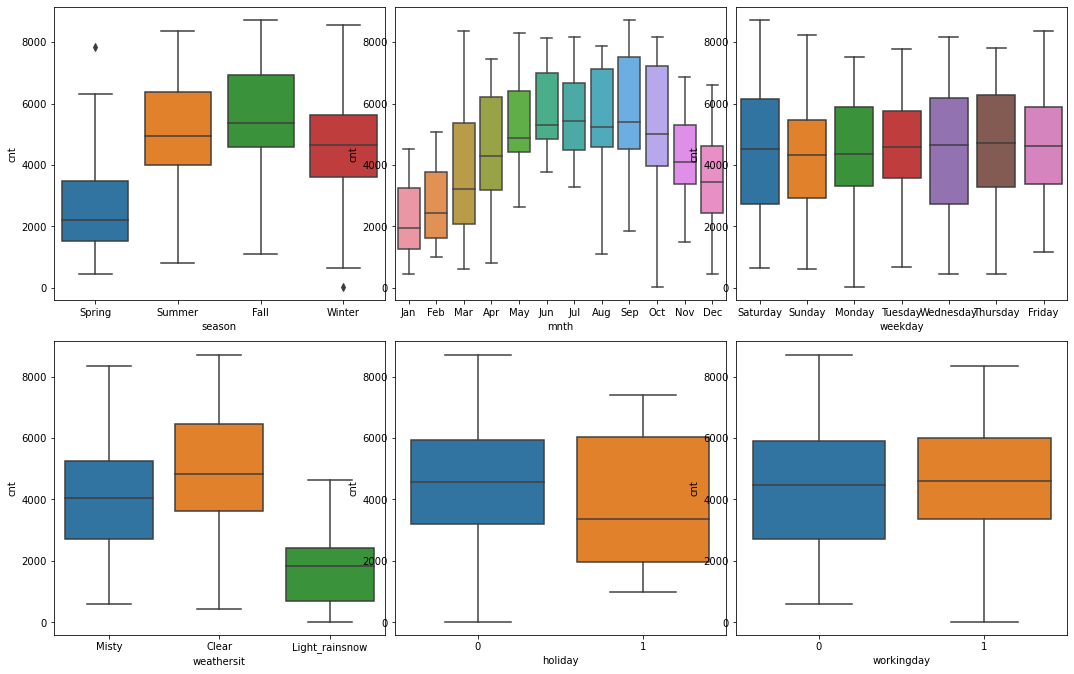

In [70]:
plt.figure(figsize=(15, 9))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.tight_layout(pad = 1) 
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()


These categorical data is in format of numerical so we can create dummy variable with names of these variables

## Step 3: Data Preparation

In [13]:
#There are some unneccesary columns like Instant (just serial no), dteday (information already extracted in other columns) Better to drop them

day = day.drop(['instant', 'dteday'],axis=1)


In [14]:
#also no use of bifurcation of demand as casual and registered for this analysis, drop them

day = day.drop(['casual','registered'],axis=1)

In [15]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### DUMMY VARIABLE CREATION

In [16]:
#Converting season from 1,2,3,4 to Spring, summer, fall and winter as given in data dictionary
day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
day.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [17]:
#Converting mnth likewise
day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
day.mnth.value_counts(normalize=True)

Jan    0.084932
Oct    0.084932
May    0.084932
Aug    0.084932
Jul    0.084932
Dec    0.084932
Mar    0.084932
Nov    0.082192
Sep    0.082192
Jun    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [18]:
#Converting weathersit likewise
day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
day.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [19]:
#Converting weekday likewise
day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day.weekday.value_counts(normalize=True)

Monday       0.143836
Saturday     0.143836
Sunday       0.143836
Friday       0.142466
Tuesday      0.142466
Thursday     0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

Season

In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'

season = pd.get_dummies(day['season'],drop_first=True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
weather = pd.get_dummies(day['weathersit'], drop_first = True)
weather.head()

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [22]:
month = pd.get_dummies(day['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
weekday = pd.get_dummies(day['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [24]:
# Add the results season, month, weather and weekday to the original day dataframe

bike_day = pd.concat([day,season,month,weather,weekday], axis = 1)
bike_day.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [25]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Spring          730 non-null    uint8  
 13  Summer          730 non-null    uint8  
 14  Winter          730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

REMOVING UNNECCESARY COLUMNS

In [26]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_day.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_day.shape

(730, 30)

All the 30 columns are now as numeric value. The dataframe is ready now for splitting into Train & Test dataframes

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape

(510, 30)

In [29]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_test.shape

(219, 30)

In [31]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features 

### Min-Max scaling 



In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


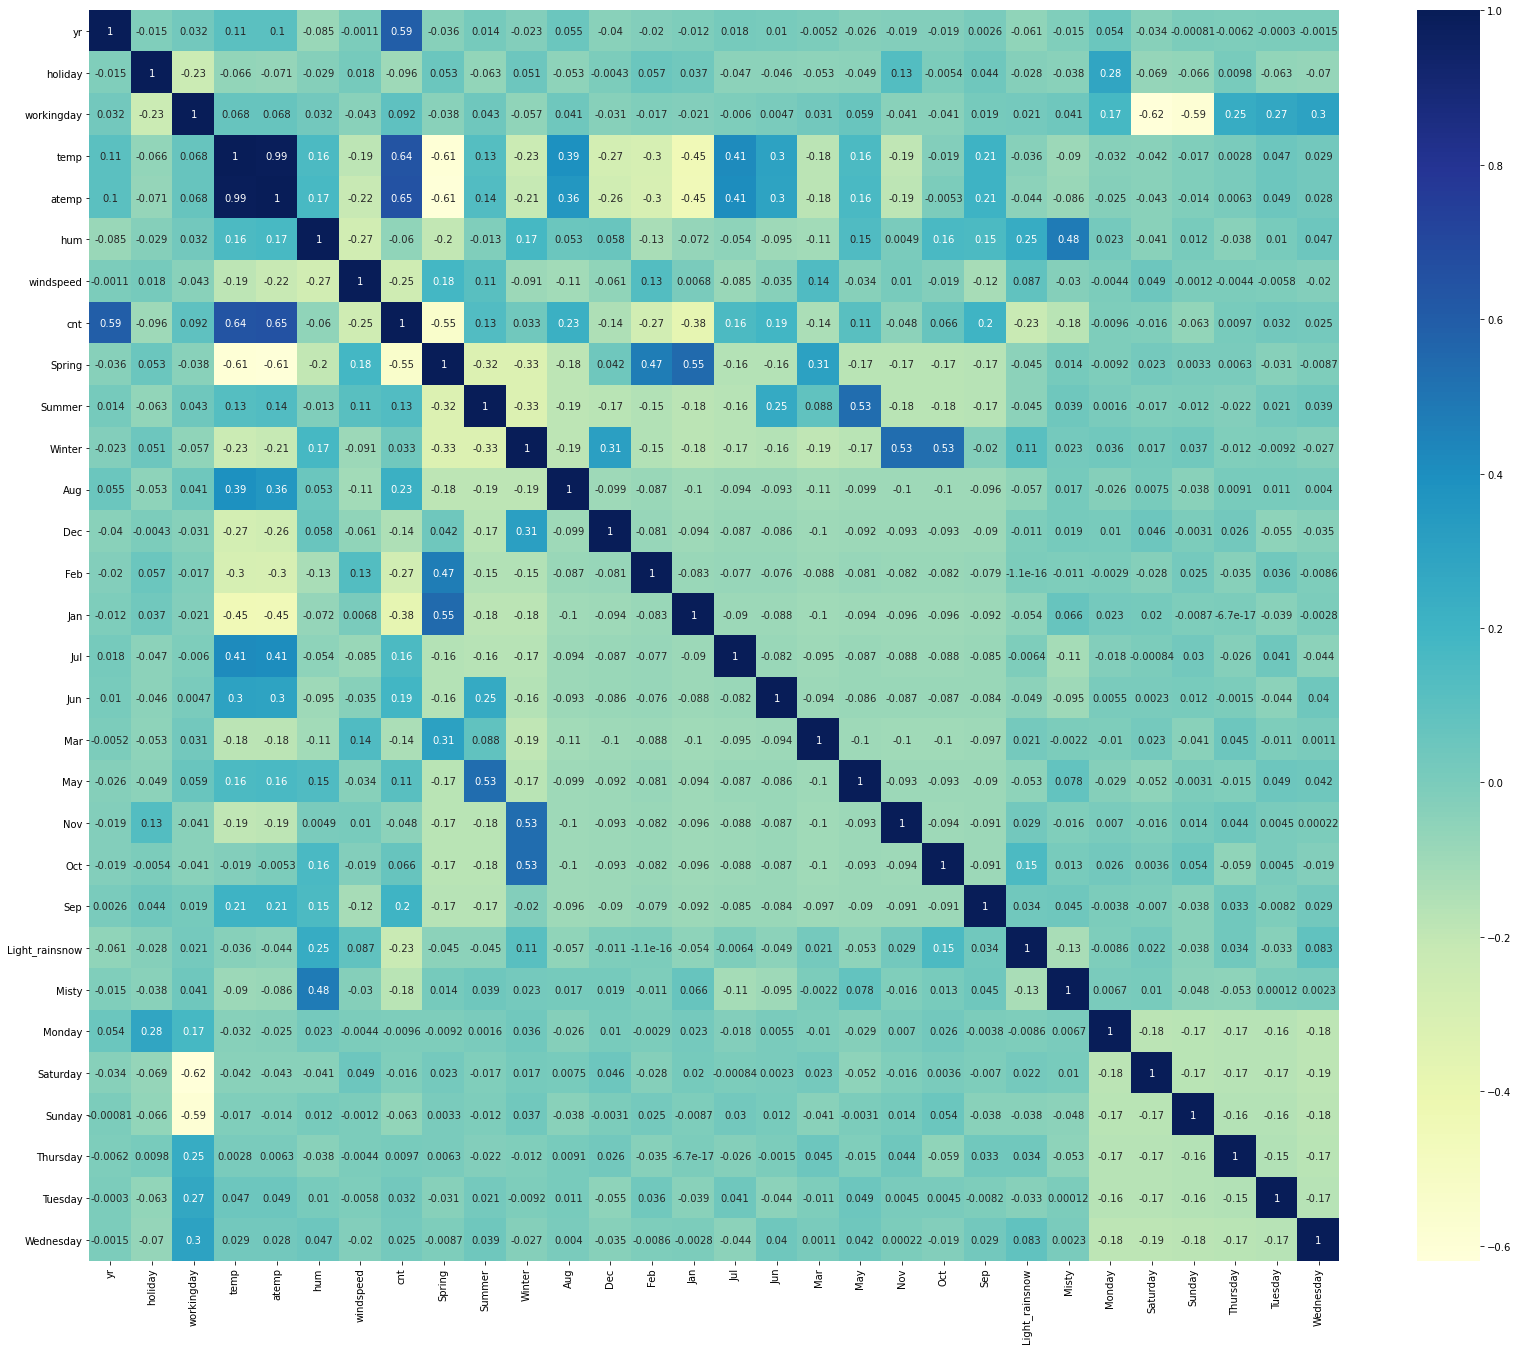

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (28, 23))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## There is multi-colinearity between the variables. We need to consider the factors when developing the model.

#### temp and atemp has very high correlation value of 0.99.
#### workingday variable has high negative correlation with Sat & Sun (where workingday =0)


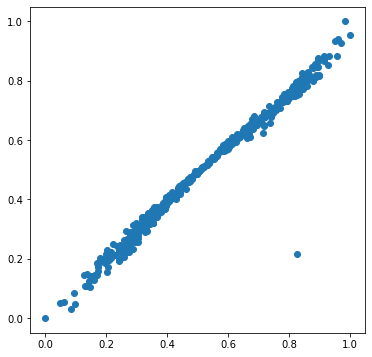

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.atemp)
plt.show()

### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE and Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 5),
 ('Winter', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10)]

In [43]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Jan', 'Jul', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday',
       'Sunday'],
      dtype='object')

In [44]:
# storing the selected 15 variables in col list
X_train.columns[~rfe.support_]


Index(['atemp', 'Summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [45]:
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics and Manual selection of variables


In [46]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,41.60
13,Saturday,10.14
14,Sunday,9.82
3,temp,3.19
6,Spring,2.72
1,holiday,2.58
4,hum,1.90
7,Winter,1.81
12,Misty,1.57
8,Jan,1.55


In [49]:
#model build 1
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.03e-190
Time:                        22:48:33   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2503      0.025      9.

In [50]:
#Holiday has high p value so remove it

X_train_new = X_train_rfe.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,29.73
2,temp,18.10
1,workingday,17.04
12,Saturday,4.60
4,windspeed,4.55
13,Sunday,4.47
5,Spring,3.11
11,Misty,2.28
6,Winter,2.18
0,yr,2.09


In [51]:
#model build 2 (rebuild)
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.03e-190
Time:                        22:48:36   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2443      0.040      6.

In [52]:
#MODEL 3
# hum has high VIF - drop it 
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,workingday,13.48
2,temp,12.76
3,windspeed,4.51
11,Saturday,3.85
12,Sunday,3.60
4,Spring,2.85
0,yr,2.07
5,Winter,1.79
6,Jan,1.65
10,Misty,1.58


In [53]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.12e-188
Time:                        22:48:40   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1686      0.035      4.

In [54]:
# Model 4
#Sunday has high p value, drop it
X_train_new = X_train_new.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.62
1,workingday,4.50
3,windspeed,4.12
4,Spring,2.36
0,yr,2.07
11,Saturday,1.80
6,Jan,1.61
10,Misty,1.55
5,Winter,1.45
7,Jul,1.37


In [55]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.76e-188
Time:                        22:48:44   Log-Likelihood:                 504.69
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     497   BIC:                            -928.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2180      0.026      8.

In [56]:
#Model 5 
# Drop Jan with high p value
X_train_new = X_train_new.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.54
1,workingday,4.47
3,windspeed,4.11
0,yr,2.06
4,Spring,1.81
10,Saturday,1.79
9,Misty,1.54
5,Winter,1.45
6,Jul,1.36
7,Sep,1.20


In [57]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.53e-188
Time:                        22:48:46   Log-Likelihood:                 501.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2038      0.025      8.

In [58]:
lr5.params

const             0.203763
yr                0.234436
workingday        0.054329
temp              0.450991
windspeed        -0.141537
Spring           -0.111664
Winter            0.047970
Jul              -0.069941
Sep               0.054164
Light_rainsnow   -0.290446
Misty            -0.082523
Saturday          0.065883
dtype: float64

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

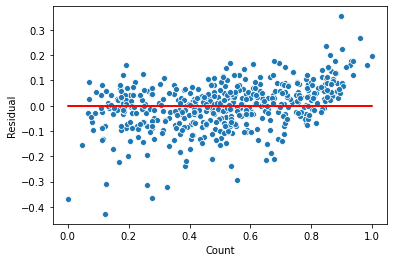

In [59]:
# Making predictions
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

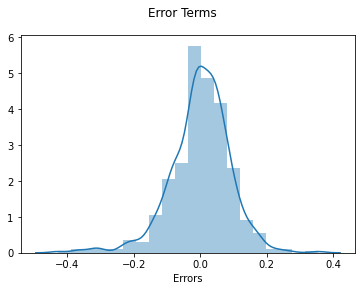

In [60]:
# Plot the histogram of the error terms

res = y_train-y_train_pred

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()                   

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [61]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [62]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   windspeed       219 non-null    float64
 5   Spring          219 non-null    uint8  
 6   Winter          219 non-null    uint8  
 7   Jul             219 non-null    uint8  
 8   Sep             219 non-null    uint8  
 9   Light_rainsnow  219 non-null    uint8  
 10  Misty           219 non-null    uint8  
 11  Saturday        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [65]:
# Now let's use our model to make predictions.

y_pred = lr5.predict(X_test_lm5)

# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

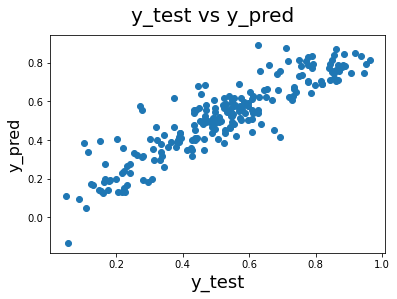

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

So the model predict is-

const             0.203763 , 
yr                0.234436 , 
workingday        0.054329 , 
temp              0.450991 , 
windspeed        -0.141537 , 
Spring           -0.111664 , 
Winter            0.047970 , 
Jul              -0.069941 , 
Sep               0.054164 , 
Light_rainsnow   -0.290446 , 
Misty            -0.082523 , 
Saturday          0.065883
        
cnt=0.203763 + (0.234436 x yr) + (0.054329 x workingday) + (0.450991 x temp) − (0.141537 x windspeed) - (0.111664 x Spring) + (0.047970 x Winter) + (0.054164 x Sep) - (0.069941  x Jul) +(0.065883 x Saturday) − (0.082523 x Misty) − (0.290446 x Light_rainsnow)